In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_4.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/03/2020 21:53:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 21:53:23 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 21:53:24 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 21:53:25 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/03/2020 21:53:26 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run06_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

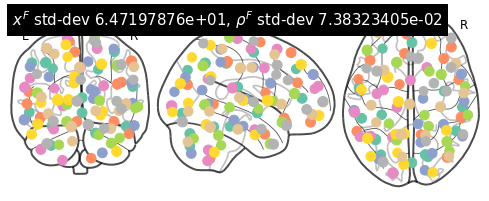

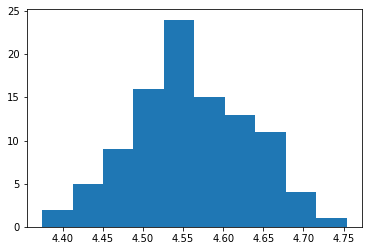

(<nilearn.plotting.displays.OrthoProjector at 0x7fca35e15910>,
 tensor([[-29.8201, -31.6970, -21.3897],
         [ 35.9921,  -6.7420,  56.7206],
         [ 48.3495, -48.6361, -21.7751],
         [-36.2002, -57.7424,  45.0842],
         [-28.8341,  37.9261,  39.0269],
         [  2.0698,  44.2568,   8.2161],
         [  1.9953, -82.0604,  -7.6185],
         [ 18.9734, -76.1513,  37.9665],
         [-50.8498, -35.4312,  44.9934],
         [ 55.3488, -23.6290,  20.1288],
         [-53.5718,  -2.8896,  -7.1977],
         [ 16.2836, -73.7089, -29.0112],
         [-30.6697, -73.7919, -41.9683],
         [ 35.5256,  27.4822, -16.7863],
         [-11.0064,   0.4022,  67.2312],
         [ -5.6125,  32.7047,  56.2791],
         [ 39.1136, -76.4331,  22.6347],
         [ 43.5060,  39.4589,  24.6276],
         [ 11.5677, -52.5408, -55.4510],
         [-55.8852, -49.0119,   1.9298],
         [ 51.2921,   5.0944, -29.6162],
         [-42.0533,  25.4620, -12.6832],
         [ 54.0309, -34.4167,  46.7

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

464

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/03/2020 21:54:29 [Epoch 1] (6129ms) Posterior free-energy 8.11869338e+09 = KL from prior 1.37661320e+07 - log-likelihood -8.10492723e+09
10/03/2020 21:54:29 Saving checkpoint...
10/03/2020 21:54:35 [Epoch 2] (6038ms) Posterior free-energy 7.91030272e+09 = KL from prior 9.08705200e+06 - log-likelihood -7.90121626e+09
10/03/2020 21:54:41 [Epoch 3] (5946ms) Posterior free-energy 7.76037530e+09 = KL from prior 6.56297400e+06 - log-likelihood -7.75381453e+09
10/03/2020 21:54:47 [Epoch 4] (5982ms) Posterior free-energy 7.66539315e+09 = KL from prior 5.07574450e+06 - log-likelihood -7.66031872e+09
10/03/2020 21:54:53 [Epoch 5] (5929ms) Posterior free-energy 7.58852813e+09 = KL from prior 3.83277325e+06 - log-likelihood -7.58469581e+09
10/03/2020 21:54:58 [Epoch 6] (5973ms) Posterior free-energy 7.53422643e+09 = KL from prior 2.75556775e+06 - log-likelihood -7.53146982e+09
10/03/2020 21:55:04 [Epoch 7] (5966ms) Posterior free-energy 7.49020570e+09 = KL from prior 1.78265075e+06 - log-likeli

Epoch   385: reducing learning rate of group 0 to 5.0000e-03.
Epoch   385: reducing learning rate of group 1 to 5.0000e-04.
Epoch   385: reducing learning rate of group 2 to 5.0000e-03.
Epoch   385: reducing learning rate of group 3 to 5.0000e-04.


10/03/2020 22:32:38 [Epoch 386] (5903ms) Posterior free-energy 5.22691021e+09 = KL from prior 1.66643900e+06 - log-likelihood -5.22524365e+09
10/03/2020 22:32:44 [Epoch 387] (5909ms) Posterior free-energy 5.19653939e+09 = KL from prior 1.66611550e+06 - log-likelihood -5.19487437e+09
10/03/2020 22:32:50 [Epoch 388] (5902ms) Posterior free-energy 5.19499930e+09 = KL from prior 1.66254962e+06 - log-likelihood -5.19333530e+09
10/03/2020 22:32:55 [Epoch 389] (5878ms) Posterior free-energy 5.19424973e+09 = KL from prior 1.66239938e+06 - log-likelihood -5.19258726e+09
10/03/2020 22:33:01 [Epoch 390] (5944ms) Posterior free-energy 5.19374746e+09 = KL from prior 1.66267212e+06 - log-likelihood -5.19208602e+09
10/03/2020 22:33:07 [Epoch 391] (5904ms) Posterior free-energy 5.19334912e+09 = KL from prior 1.66650275e+06 - log-likelihood -5.19168102e+09
10/03/2020 22:33:13 [Epoch 392] (5928ms) Posterior free-energy 5.19299891e+09 = KL from prior 1.66797662e+06 - log-likelihood -5.19133133e+09
10/03/

Epoch   622: reducing learning rate of group 0 to 2.5000e-03.
Epoch   622: reducing learning rate of group 1 to 2.5000e-04.
Epoch   622: reducing learning rate of group 2 to 2.5000e-03.
Epoch   622: reducing learning rate of group 3 to 2.5000e-04.


10/03/2020 22:56:09 [Epoch 623] (6003ms) Posterior free-energy 5.17173606e+09 = KL from prior 1.72674075e+06 - log-likelihood -5.17000960e+09
10/03/2020 22:56:15 [Epoch 624] (5955ms) Posterior free-energy 5.16796928e+09 = KL from prior 1.72079738e+06 - log-likelihood -5.16624998e+09
10/03/2020 22:56:21 [Epoch 625] (5974ms) Posterior free-energy 5.16761856e+09 = KL from prior 1.72391700e+06 - log-likelihood -5.16589363e+09
10/03/2020 22:56:27 [Epoch 626] (5988ms) Posterior free-energy 5.16748749e+09 = KL from prior 1.71992550e+06 - log-likelihood -5.16576819e+09
10/03/2020 22:56:33 [Epoch 627] (5984ms) Posterior free-energy 5.16737382e+09 = KL from prior 1.72249175e+06 - log-likelihood -5.16565146e+09
10/03/2020 22:56:39 [Epoch 628] (5998ms) Posterior free-energy 5.16726528e+09 = KL from prior 1.71961975e+06 - log-likelihood -5.16554598e+09
10/03/2020 22:56:45 [Epoch 629] (5861ms) Posterior free-energy 5.16710042e+09 = KL from prior 1.72066112e+06 - log-likelihood -5.16537907e+09
10/03/

Epoch   779: reducing learning rate of group 0 to 1.2500e-03.
Epoch   779: reducing learning rate of group 1 to 1.2500e-04.
Epoch   779: reducing learning rate of group 2 to 1.2500e-03.
Epoch   779: reducing learning rate of group 3 to 1.2500e-04.


10/03/2020 23:11:37 [Epoch 780] (5981ms) Posterior free-energy 5.16235418e+09 = KL from prior 1.73988625e+06 - log-likelihood -5.16061440e+09
10/03/2020 23:11:43 [Epoch 781] (6015ms) Posterior free-energy 5.16213146e+09 = KL from prior 1.73605425e+06 - log-likelihood -5.16039629e+09
10/03/2020 23:11:49 [Epoch 782] (6016ms) Posterior free-energy 5.16202752e+09 = KL from prior 1.73536950e+06 - log-likelihood -5.16029235e+09
10/03/2020 23:11:55 [Epoch 783] (6012ms) Posterior free-energy 5.16210688e+09 = KL from prior 1.73496250e+06 - log-likelihood -5.16037222e+09
10/03/2020 23:12:01 [Epoch 784] (5996ms) Posterior free-energy 5.16186778e+09 = KL from prior 1.73894338e+06 - log-likelihood -5.16012749e+09
10/03/2020 23:12:07 [Epoch 785] (5853ms) Posterior free-energy 5.16195226e+09 = KL from prior 1.73475162e+06 - log-likelihood -5.16021709e+09
10/03/2020 23:12:13 [Epoch 786] (5872ms) Posterior free-energy 5.16180838e+09 = KL from prior 1.73569512e+06 - log-likelihood -5.16007168e+09
10/03/

Epoch   807: reducing learning rate of group 0 to 6.2500e-04.
Epoch   807: reducing learning rate of group 1 to 6.2500e-05.
Epoch   807: reducing learning rate of group 2 to 6.2500e-04.
Epoch   807: reducing learning rate of group 3 to 6.2500e-05.


10/03/2020 23:14:22 [Epoch 808] (5858ms) Posterior free-energy 5.16137830e+09 = KL from prior 1.73573900e+06 - log-likelihood -5.15964262e+09
10/03/2020 23:14:28 [Epoch 809] (5837ms) Posterior free-energy 5.16130662e+09 = KL from prior 1.73557600e+06 - log-likelihood -5.15956992e+09
10/03/2020 23:14:34 [Epoch 810] (5891ms) Posterior free-energy 5.16131584e+09 = KL from prior 1.73873975e+06 - log-likelihood -5.15957658e+09
10/03/2020 23:14:40 [Epoch 811] (5846ms) Posterior free-energy 5.16131635e+09 = KL from prior 1.73684075e+06 - log-likelihood -5.15957914e+09
10/03/2020 23:14:46 [Epoch 812] (5877ms) Posterior free-energy 5.16132762e+09 = KL from prior 1.73598425e+06 - log-likelihood -5.15959142e+09
10/03/2020 23:14:52 [Epoch 813] (5808ms) Posterior free-energy 5.16130355e+09 = KL from prior 1.73581212e+06 - log-likelihood -5.15956838e+09
10/03/2020 23:14:58 [Epoch 814] (5850ms) Posterior free-energy 5.16114688e+09 = KL from prior 1.73861200e+06 - log-likelihood -5.15940813e+09
10/03/

Epoch   835: reducing learning rate of group 0 to 3.1250e-04.
Epoch   835: reducing learning rate of group 1 to 3.1250e-05.
Epoch   835: reducing learning rate of group 2 to 3.1250e-04.
Epoch   835: reducing learning rate of group 3 to 3.1250e-05.


10/03/2020 23:17:07 [Epoch 836] (5893ms) Posterior free-energy 5.16098202e+09 = KL from prior 1.73411125e+06 - log-likelihood -5.15924838e+09
10/03/2020 23:17:13 [Epoch 837] (5894ms) Posterior free-energy 5.16088371e+09 = KL from prior 1.73514075e+06 - log-likelihood -5.15914957e+09
10/03/2020 23:17:18 [Epoch 838] (5855ms) Posterior free-energy 5.16093184e+09 = KL from prior 1.73748875e+06 - log-likelihood -5.15919411e+09
10/03/2020 23:17:24 [Epoch 839] (5852ms) Posterior free-energy 5.16101734e+09 = KL from prior 1.73823850e+06 - log-likelihood -5.15927910e+09
10/03/2020 23:17:30 [Epoch 840] (5875ms) Posterior free-energy 5.16096358e+09 = KL from prior 1.73774288e+06 - log-likelihood -5.15922483e+09
10/03/2020 23:17:36 [Epoch 841] (5856ms) Posterior free-energy 5.16092621e+09 = KL from prior 1.73687100e+06 - log-likelihood -5.15918950e+09
10/03/2020 23:17:42 [Epoch 842] (5864ms) Posterior free-energy 5.16093440e+09 = KL from prior 1.73490125e+06 - log-likelihood -5.15919974e+09
10/03/

Epoch   856: reducing learning rate of group 0 to 1.5625e-04.
Epoch   856: reducing learning rate of group 1 to 1.5625e-05.
Epoch   856: reducing learning rate of group 2 to 1.5625e-04.
Epoch   856: reducing learning rate of group 3 to 1.5625e-05.


10/03/2020 23:19:10 [Epoch 857] (5863ms) Posterior free-energy 5.16085555e+09 = KL from prior 1.73556712e+06 - log-likelihood -5.15911987e+09
10/03/2020 23:19:16 [Epoch 858] (5873ms) Posterior free-energy 5.16082432e+09 = KL from prior 1.73638538e+06 - log-likelihood -5.15908710e+09
10/03/2020 23:19:22 [Epoch 859] (5853ms) Posterior free-energy 5.16078490e+09 = KL from prior 1.73899250e+06 - log-likelihood -5.15904666e+09
10/03/2020 23:19:28 [Epoch 860] (5846ms) Posterior free-energy 5.16092826e+09 = KL from prior 1.73504825e+06 - log-likelihood -5.15919360e+09
10/03/2020 23:19:33 [Epoch 861] (5860ms) Posterior free-energy 5.16089651e+09 = KL from prior 1.73902212e+06 - log-likelihood -5.15915776e+09
10/03/2020 23:19:39 [Epoch 862] (5893ms) Posterior free-energy 5.16089702e+09 = KL from prior 1.73617438e+06 - log-likelihood -5.15916134e+09
10/03/2020 23:19:45 [Epoch 863] (5876ms) Posterior free-energy 5.16077312e+09 = KL from prior 1.73791100e+06 - log-likelihood -5.15903488e+09
10/03/

Epoch   898: reducing learning rate of group 0 to 7.8125e-05.
Epoch   898: reducing learning rate of group 1 to 1.0000e-05.
Epoch   898: reducing learning rate of group 2 to 7.8125e-05.
Epoch   898: reducing learning rate of group 3 to 1.0000e-05.


10/03/2020 23:23:17 [Epoch 899] (5893ms) Posterior free-energy 5.16069888e+09 = KL from prior 1.73637525e+06 - log-likelihood -5.15896115e+09
10/03/2020 23:23:23 [Epoch 900] (5856ms) Posterior free-energy 5.16066202e+09 = KL from prior 1.73765062e+06 - log-likelihood -5.15892480e+09
10/03/2020 23:23:28 [Epoch 901] (5866ms) Posterior free-energy 5.16076493e+09 = KL from prior 1.73735350e+06 - log-likelihood -5.15902720e+09
10/03/2020 23:23:28 Saving checkpoint...
10/03/2020 23:23:34 [Epoch 902] (5857ms) Posterior free-energy 5.16072755e+09 = KL from prior 1.73581662e+06 - log-likelihood -5.15899034e+09
10/03/2020 23:23:40 [Epoch 903] (5884ms) Posterior free-energy 5.16070400e+09 = KL from prior 1.73711550e+06 - log-likelihood -5.15896678e+09
10/03/2020 23:23:46 [Epoch 904] (5842ms) Posterior free-energy 5.16067430e+09 = KL from prior 1.73497112e+06 - log-likelihood -5.15893965e+09
10/03/2020 23:23:52 [Epoch 905] (5860ms) Posterior free-energy 5.16067379e+09 = KL from prior 1.73693625e+0

Epoch   919: reducing learning rate of group 0 to 3.9063e-05.
Epoch   919: reducing learning rate of group 2 to 3.9063e-05.


10/03/2020 23:25:21 [Epoch 920] (5969ms) Posterior free-energy 5.16074496e+09 = KL from prior 1.73523712e+06 - log-likelihood -5.15900928e+09
10/03/2020 23:25:27 [Epoch 921] (5951ms) Posterior free-energy 5.16067174e+09 = KL from prior 1.73542088e+06 - log-likelihood -5.15893606e+09
10/03/2020 23:25:33 [Epoch 922] (6026ms) Posterior free-energy 5.16070195e+09 = KL from prior 1.73641662e+06 - log-likelihood -5.15896525e+09
10/03/2020 23:25:39 [Epoch 923] (5954ms) Posterior free-energy 5.16073677e+09 = KL from prior 1.73943088e+06 - log-likelihood -5.15899699e+09
10/03/2020 23:25:45 [Epoch 924] (5950ms) Posterior free-energy 5.16067430e+09 = KL from prior 1.73541475e+06 - log-likelihood -5.15893965e+09
10/03/2020 23:25:51 [Epoch 925] (5946ms) Posterior free-energy 5.16067891e+09 = KL from prior 1.73561600e+06 - log-likelihood -5.15894374e+09
10/03/2020 23:25:57 [Epoch 926] (5967ms) Posterior free-energy 5.16067174e+09 = KL from prior 1.73524988e+06 - log-likelihood -5.15893555e+09
10/03/

Epoch   940: reducing learning rate of group 0 to 1.9531e-05.
Epoch   940: reducing learning rate of group 2 to 1.9531e-05.


10/03/2020 23:27:27 [Epoch 941] (5987ms) Posterior free-energy 5.16066765e+09 = KL from prior 1.73723188e+06 - log-likelihood -5.15892941e+09
10/03/2020 23:27:33 [Epoch 942] (5981ms) Posterior free-energy 5.16067430e+09 = KL from prior 1.73528738e+06 - log-likelihood -5.15893760e+09
10/03/2020 23:27:39 [Epoch 943] (5952ms) Posterior free-energy 5.16077466e+09 = KL from prior 1.73337125e+06 - log-likelihood -5.15904102e+09
10/03/2020 23:27:45 [Epoch 944] (5950ms) Posterior free-energy 5.16058522e+09 = KL from prior 1.73452150e+06 - log-likelihood -5.15885107e+09
10/03/2020 23:27:51 [Epoch 945] (5969ms) Posterior free-energy 5.16080128e+09 = KL from prior 1.73515512e+06 - log-likelihood -5.15906458e+09
10/03/2020 23:27:57 [Epoch 946] (5950ms) Posterior free-energy 5.16067635e+09 = KL from prior 1.73378962e+06 - log-likelihood -5.15894374e+09
10/03/2020 23:28:03 [Epoch 947] (5965ms) Posterior free-energy 5.16068403e+09 = KL from prior 1.73241750e+06 - log-likelihood -5.15895296e+09
10/03/

Epoch   961: reducing learning rate of group 0 to 1.0000e-05.
Epoch   961: reducing learning rate of group 2 to 1.0000e-05.


10/03/2020 23:29:31 [Epoch 962] (5856ms) Posterior free-energy 5.16060928e+09 = KL from prior 1.73598788e+06 - log-likelihood -5.15887360e+09
10/03/2020 23:29:37 [Epoch 963] (5876ms) Posterior free-energy 5.16055757e+09 = KL from prior 1.73815375e+06 - log-likelihood -5.15881882e+09
10/03/2020 23:29:43 [Epoch 964] (5862ms) Posterior free-energy 5.16056781e+09 = KL from prior 1.73593350e+06 - log-likelihood -5.15883213e+09
10/03/2020 23:29:49 [Epoch 965] (5836ms) Posterior free-energy 5.16065638e+09 = KL from prior 1.73545238e+06 - log-likelihood -5.15892070e+09
10/03/2020 23:29:55 [Epoch 966] (5858ms) Posterior free-energy 5.16067840e+09 = KL from prior 1.73557400e+06 - log-likelihood -5.15894272e+09
10/03/2020 23:30:01 [Epoch 967] (5887ms) Posterior free-energy 5.16066867e+09 = KL from prior 1.73602588e+06 - log-likelihood -5.15893299e+09
10/03/2020 23:30:06 [Epoch 968] (5890ms) Posterior free-energy 5.16062669e+09 = KL from prior 1.74108112e+06 - log-likelihood -5.15888538e+09
10/03/

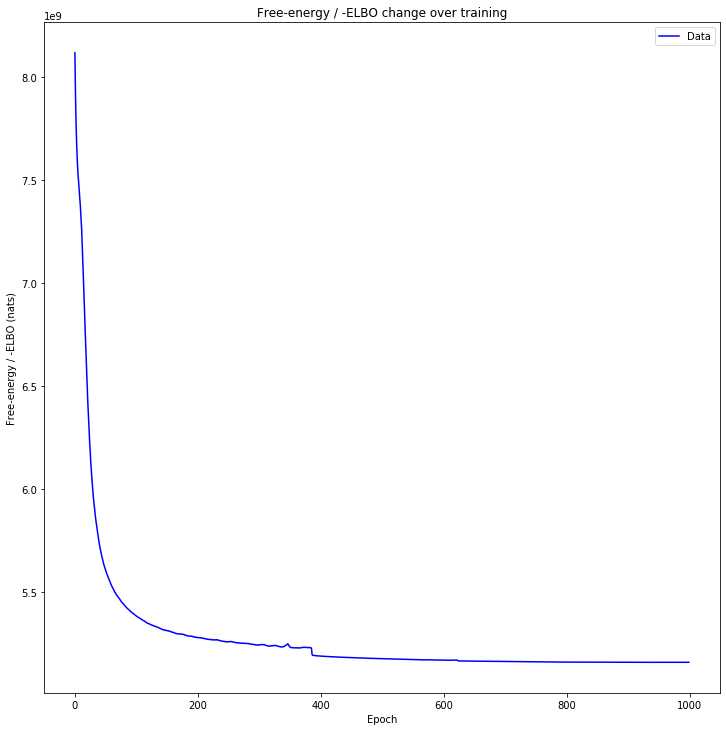

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/03/2020 23:33:18 [Epoch 1] (687ms) Posterior free-energy 1.24666291e+09 = KL from prior 9.47248828e+04 - log-likelihood -1.24656819e+09
10/03/2020 23:33:18 Saving checkpoint...
10/03/2020 23:33:18 [Epoch 2] (694ms) Posterior free-energy 1.21033139e+09 = KL from prior 9.28607266e+04 - log-likelihood -1.21023846e+09
10/03/2020 23:33:19 [Epoch 3] (694ms) Posterior free-energy 1.19490445e+09 = KL from prior 9.03835547e+04 - log-likelihood -1.19481408e+09
10/03/2020 23:33:20 [Epoch 4] (696ms) Posterior free-energy 1.16165056e+09 = KL from prior 8.81806094e+04 - log-likelihood -1.16156237e+09
10/03/2020 23:33:20 [Epoch 5] (692ms) Posterior free-energy 1.13975475e+09 = KL from prior 8.79647500e+04 - log-likelihood -1.13966669e+09
10/03/2020 23:33:21 [Epoch 6] (691ms) Posterior free-energy 1.12788045e+09 = KL from prior 8.57937734e+04 - log-likelihood -1.12779469e+09
10/03/2020 23:33:22 [Epoch 7] (689ms) Posterior free-energy 1.10435802e+09 = KL from prior 8.56575625e+04 - log-likelihood -1

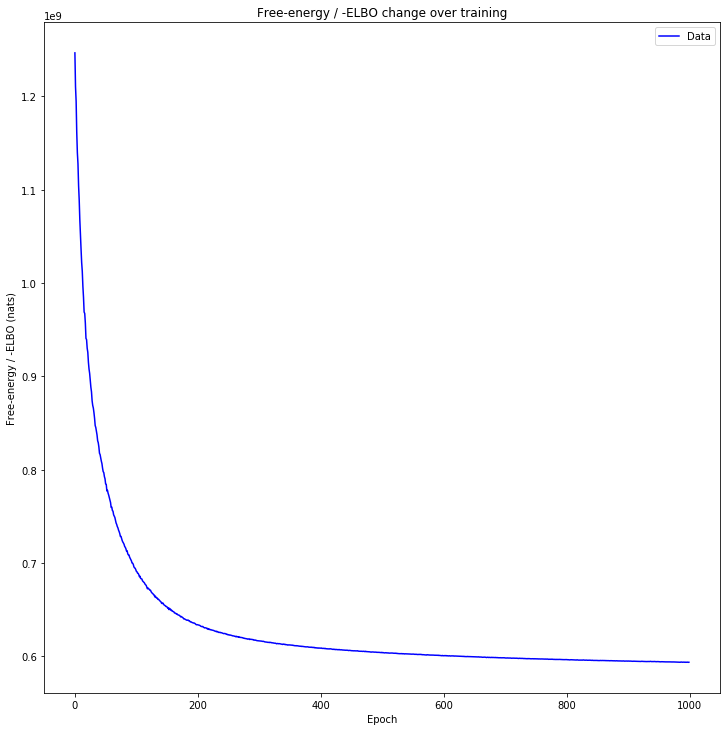

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

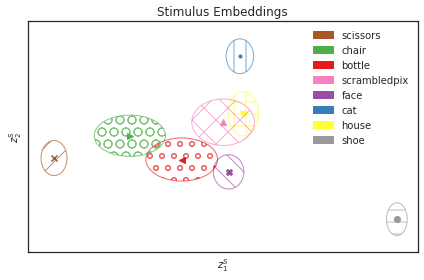

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

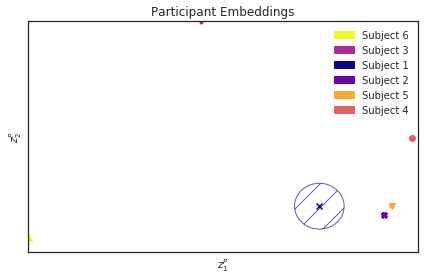

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/03/2020 23:44:58 Plotting factors for Participant 5, run 6


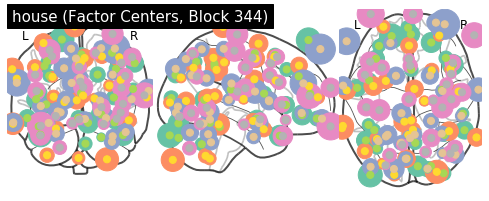

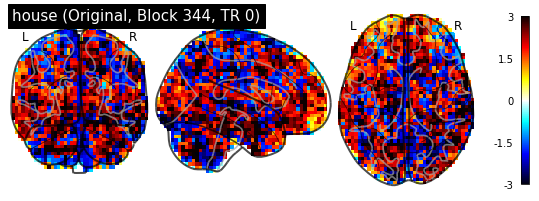

10/03/2020 23:45:00 Reconstruction Error (Frobenius Norm): 1.25617943e+02 out of 6.14250000e+02


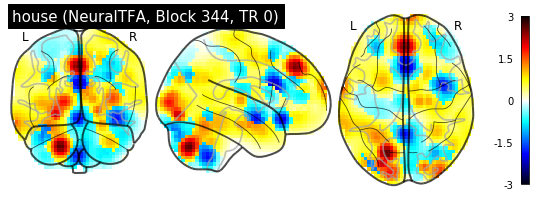

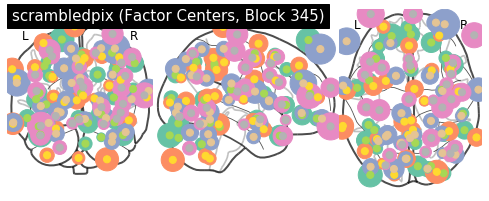

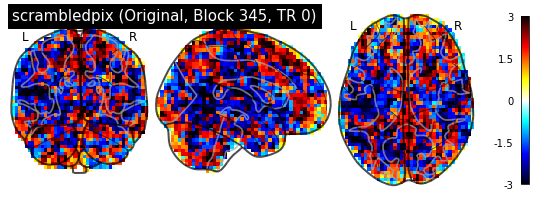

10/03/2020 23:45:03 Reconstruction Error (Frobenius Norm): 1.22847763e+02 out of 5.72544434e+02


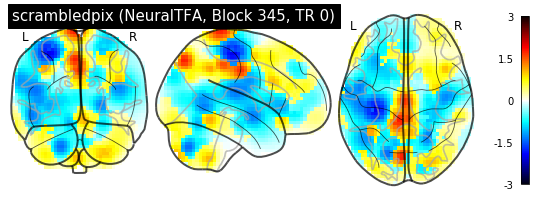

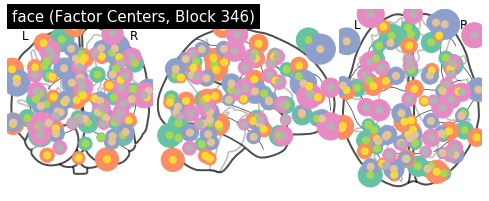

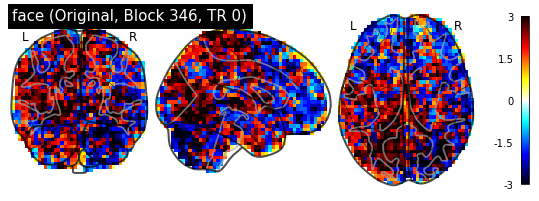

10/03/2020 23:45:06 Reconstruction Error (Frobenius Norm): 1.11579674e+02 out of 5.97191467e+02


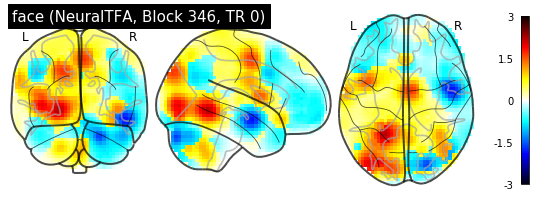

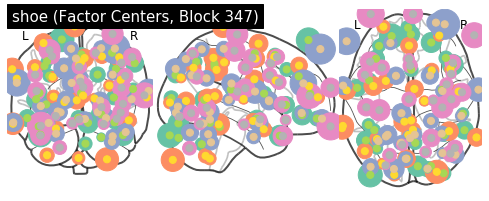

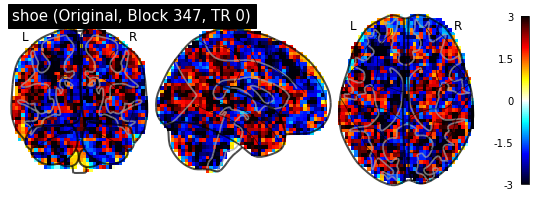

10/03/2020 23:45:09 Reconstruction Error (Frobenius Norm): 1.25816261e+02 out of 6.05494934e+02


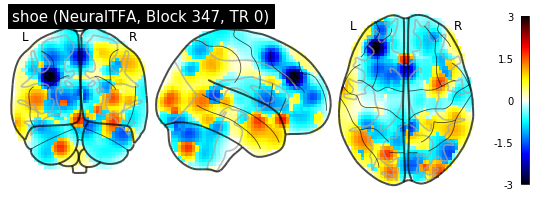

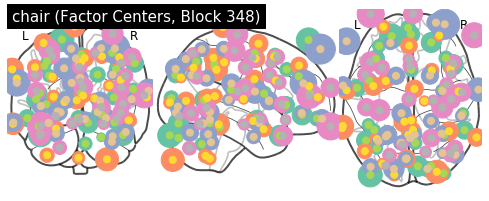

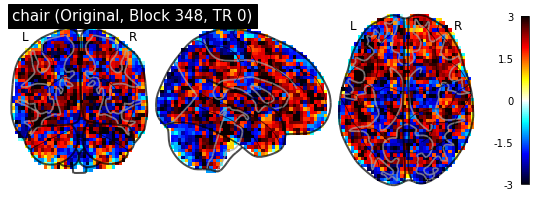

10/03/2020 23:45:12 Reconstruction Error (Frobenius Norm): 1.29576691e+02 out of 5.83909790e+02


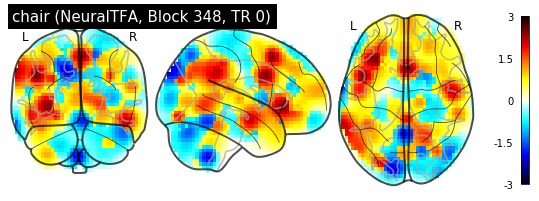

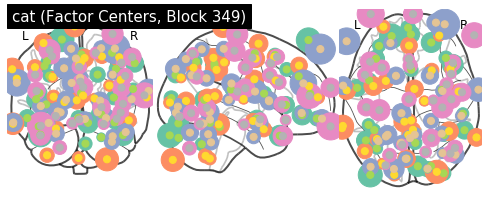

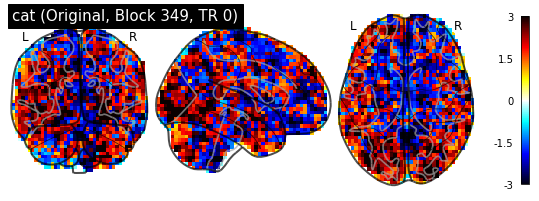

10/03/2020 23:45:14 Reconstruction Error (Frobenius Norm): 1.11535698e+02 out of 5.68216858e+02


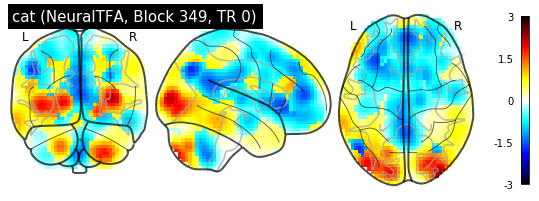

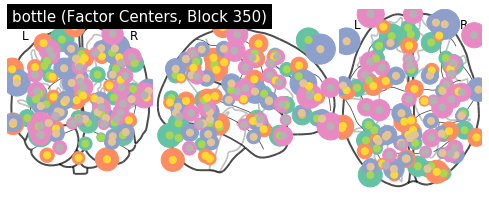

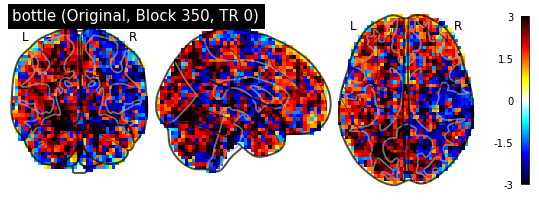

10/03/2020 23:45:17 Reconstruction Error (Frobenius Norm): 1.20935104e+02 out of 6.10756897e+02


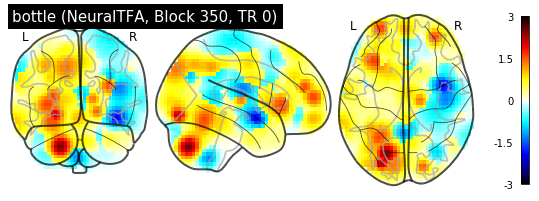

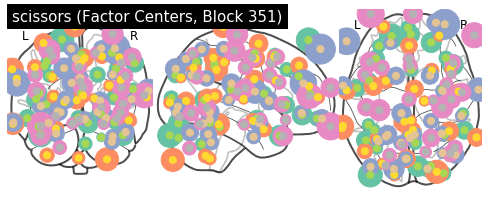

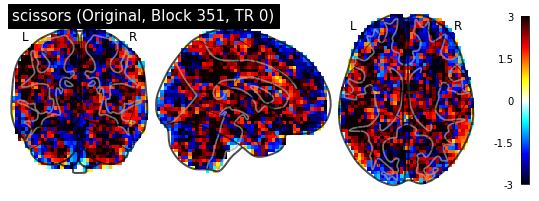

10/03/2020 23:45:20 Reconstruction Error (Frobenius Norm): 1.33373291e+02 out of 5.99311218e+02


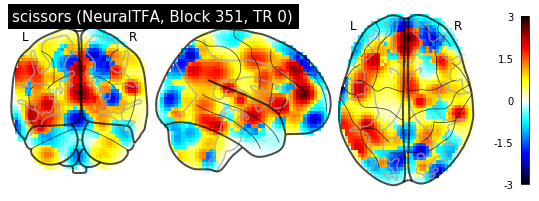

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

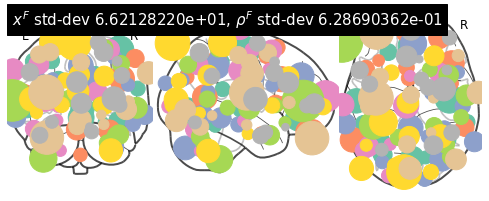

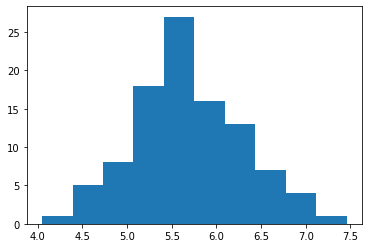

(<nilearn.plotting.displays.OrthoProjector at 0x7fc9f44cbcd0>,
 tensor([[-3.1217e+01, -4.7192e+01, -2.0699e+01],
         [ 4.1487e+01, -1.4996e+01,  5.8343e+01],
         [ 3.9201e+01, -5.7649e+01, -1.6101e+01],
         [-2.9940e+01, -5.8209e+01,  4.6954e+01],
         [-2.2812e+01,  3.4200e+01,  2.7152e+01],
         [ 1.0304e+00,  4.0486e+01, -1.2602e+01],
         [ 2.4087e+00, -7.7184e+01, -3.3089e+00],
         [ 1.6359e+01, -7.6656e+01,  3.4283e+01],
         [-4.8883e+01, -4.1254e+01,  4.6433e+01],
         [ 6.0496e+01, -3.9360e+01,  1.7842e+01],
         [-5.6476e+01, -1.7077e+01, -7.1633e-02],
         [ 2.4158e+01, -7.3820e+01, -1.6921e+01],
         [-2.8689e+01, -7.3769e+01, -4.3452e+01],
         [ 3.0850e+01,  4.8986e+01, -2.6379e+01],
         [-1.2277e+00,  6.8204e+00,  5.2745e+01],
         [-3.7104e+00,  1.8171e+01,  6.1869e+01],
         [ 3.2062e+01, -7.7058e+01,  3.0642e+01],
         [ 4.3856e+01,  2.2409e+01,  2.8359e+01],
         [ 2.7849e-01, -5.5200e+01, -

In [20]:
dtfa.visualize_factor_embedding()

In [ ]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

In [ ]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))